In [1]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['QQQ', 'SQQQ']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("QQQ vs. SQQQ Performance Comparison", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


In [3]:
# Set the tickers and time range
tickers = ["QQQ", "SQQQ"]
start_date = "2023-01-01"
end_date = "2023-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price            Close                    High                     Low  \
Ticker             QQQ        SQQQ         QQQ        SQQQ         QQQ   
Date                                                                     
2023-01-03  261.113464  255.592590  266.711274  262.173584  258.793371   
2023-01-04  262.357422  252.162979  264.045677  261.339306  259.188290   
2023-01-05  258.250366  263.841980  260.846894  265.046966  257.934462   
2023-01-06  265.378448  242.847717  266.503952  268.059400  257.026144   
2023-01-09  267.096344  237.657059  271.785882  239.464524  266.484241   

Price                         Open                Volume            
Ticker            SQQQ         QQQ        SQQQ       QQQ      SQQQ  
Date                                                                
2023-01-03  239.510875  265.230368  243.728286  42335300  17137340  
2023-01-04  247.065032  263.245990  249.521338  47754900  23562160  
2023-01-05  256.658508  260.679075  257.168319  45396700  2026

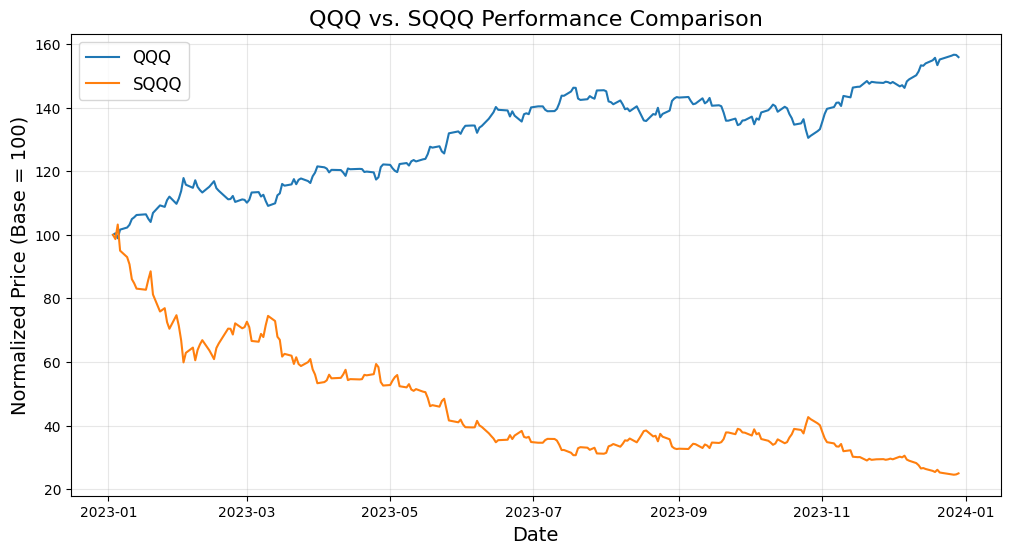

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)